# Distribution of cluster vector values

The elements of the cluster vector based on actual finite-size structures exhibit correlations.
These correlations, which are demonstrated in this notebook, affect the extent to which a training set can probe the space.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ase.build import bulk
from icet import ClusterSpace
from icet.tools import enumerate_structures
from pandas import DataFrame

First we create a primitive face-centered cubic (FCC) structure using the `bulk` function from ase.
Then we use this structure to initialize a `ClusterSpace` object, which holds information about orbits, cluster and the point functions.

In [2]:
prim = bulk('Au')
cs = ClusterSpace(prim, cutoffs=[8, 6], chemical_symbols=['Au', 'Pd'])

The `ClusterSpace` object now allows us to calculate the cluster vector of any structure based on the primitive lattice used to initialize the cluster space.
Here, we use this functionality to compute the cluster vectors of all structures with up to 10 atoms in the unit cell.
To this end, we use [a convenience function provided by `icet`](https://icet.materialsmodeling.org/moduleref_icet/tools.html#icet.tools.enumerate_structures), which generates these structures by systematic enumeration.
We store the cluster vectors in the form of a matrix, each row of which corresponds to a different structure.

In [3]:
A, sizes = [], []
for structure in enumerate_structures(prim, range(11), chemical_symbols=['Au', 'Pd']):
    A.append(cs.get_cluster_vector(structure))
    sizes.append(len(structure))
A = np.array(A)

Now we generate a corner plot showing the distributions of the cluster vector elements as well as their correlation using the `seaborn` package.
To this end, we first convert a part of the matrix corresponding to the singlet and the first three pairs to a [`pandas.DataFrame` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

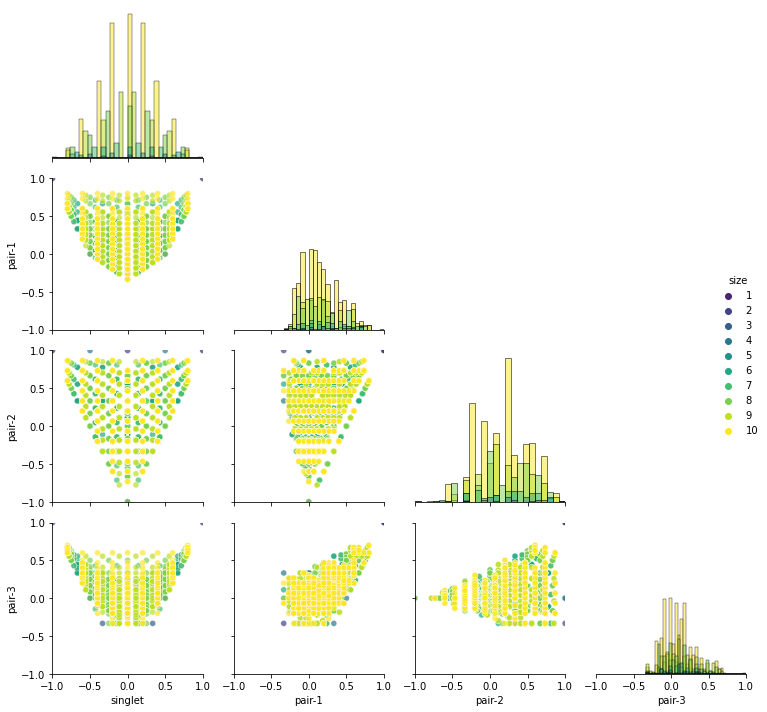

In [4]:
nmax = 4
B = A[:, 1:nmax+1]
columns = ['singlet']
columns.extend([f'pair-{k}' for k in range(1, 8)])
columns.extend([f'triplet-{k}' for k in range(1, 13)])
df = DataFrame(B, columns=columns[:nmax])
df['size'] = sizes

cmap = plt.cm.viridis
palette = dict((k, cmap(k / 10)) for k in range(1, 11))

g = sns.PairGrid(df, corner=True, hue='size', palette=palette)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, alpha=0.7)
g.add_legend()
g.set(xlim=(-1, 1))
g.set(ylim=(-1, 1))
plt.tight_layout()
plt.savefig('cluster-correlations.png', bbox_inches='tight')

The figure above illustrates an important point, namely the elements of the cluster vector are neither evenly distributed nor uncorrelated.
The extremal values are by construction $-1$ and $+1$.
Yet these extremes might not be reached due to the inherent symmetries of the underlying lattice.
As a result, the columns in the sensing matrix are correlated, which should be kept in mind when interpreting linear regression results.